<h2>numpy, pandas</h2>   


<h3>Introduction</h3>  
This assignment mainly uses the <b><code>sklearn</code></b> and <b><code>matplotlab</code></b>package in python, the purpose of using these packages is to predict the house price in London by machine learning algorithm K nearest neighbour from three variables: the east coordinate of house, the north coordinate of house and the floor area of the house. Then after the training machine uses the distance between training set data points, we can test the accuracy of this model, then we filter the best tuning parameters by cross-validation. Now, this model can predict the house price of any new data points.  To find out the trend behind the data, we will visualise the data in 3D plots, it is helpful to transform abstract data into straight forward information.      

<h3>Preprocessing Data</h3>

To begin, we will need to load the packages <b><code>numpy</code></b> and <b><code>pandas</code></b>.

In [29]:
import numpy as np
import pandas as pd

Package <b><code>pandas</code></b> makes it possible to read hpdemo.csv file in python. Then read in the house price data.

In [8]:
hp = pd.read_csv('hpdemo.csv',dtype=float)

In [9]:
print(hp)

          ID      east     north     price  fl_area
0        1.0  523800.0  179700.0  107000.0     50.0
1        2.0  533200.0  170900.0   55500.0     66.0
2        3.0  514600.0  175800.0  103000.0     90.0
3        4.0  516000.0  171000.0  187000.0    125.0
4        5.0  533700.0  169200.0   43000.0     50.0
...      ...       ...       ...       ...      ...
1400  1401.0  515600.0  173100.0   68500.0     44.0
1401  1402.0  513200.0  186500.0   58500.0     59.0
1402  1403.0  542900.0  189500.0  247000.0    185.0
1403  1404.0  524900.0  185300.0  153000.0     96.0
1404  1405.0  522000.0  185400.0  146250.0    111.0

[1405 rows x 5 columns]


Secondly, the attributes 'east', 'north' and 'fl_area' are in different units of measure. If we measure distance in the euclidean distance, the east and north attributes will dominant the most part of this, and the floor area will not show the significant difference in distance. So data is often re-scaled before applying machine learning algorithms. By doing this, the impact on different units will reduce to the lower level.

For standard scalling, we load a function called <b><code>StandardScalling</code></b> from the sub-package of sklearn.this function can re-scalling a set of utilities via z-scores.

In [34]:
from sklearn.preprocessing import StandardScaler

There are some different methods of scoring, here we will use the mean absolute error(MAE) which interpret the average of actual house price - predict house price. And the smaller MAE is, the closer predict house price approach to real value.

In [35]:
from sklearn.metrics import mean_absolute_error,make_scorer
mae = make_scorer(mean_absolute_error,greater_is_better = False)

Then, imported <b><code>KNeighborsRegressior</code></b> function from the sub-package sklearn.neighbors. This is the function we use to achieve K nearest neighbor algorithm.

In [36]:
from sklearn.neighbors import KNeighborsRegressor as NN

As we need to select the most suitable combination of the value of tuning parameters, which include the number of nearest neighbours, where to use a distance weighted mean or a simple(uniform weighted)mean as a predictor from the k nearest neighbour values and which distance metric to use (Euclidean or City Block). So import <b><code> GridSearchCV</code></b> function from <b><code>model_selection</code></b> which is sub-package of sklearn. This function can achieve cross-validation which is the method to test each combination of items in the tuning parameters dictionary. Then select the smallest value of MAE.  

In [37]:
from sklearn.model_selection import GridSearchCV

We can fed the percedure of fitting algorithm in to the boxes through pipeline method, so load the pipline function from sklearn.pipeline. The pipeline also could be used with 'GridSearchCV'.<b><code> 'NNreg__n_neighbors'</code></b> is K which from 1 to 35.<b><code> 'NNreg_weights'</code></b> is the method of choosing predictor. <b><code>'NNreg__p'</code></b> is the method of measure distance(1 = City Block, 2 = Euclidean) 

<h3>Boxing the function by pipeline.</h3>

In [14]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('zscores',StandardScaler()),('NNreg',NN())])

opt_nn = GridSearchCV(
    estimator = pipe,
    scoring = mae,
    param_grid = {
        'NNreg__n_neighbors':range(1,35),
        'NNreg__weights':['uniform','distance'],
        'NNreg__p':[1,2]})

Here the unit of price is 1000 pounds.

In [15]:
price = hp['price']/1000

The machine is trained by the data from test set, <b><code>opt_nn.fit</code></b> arguement can achieve this requirment.

In [16]:
opt_nn.fit(hp[['east','north','fl_area']],price)

GridSearchCV(estimator=Pipeline(steps=[('zscores', StandardScaler()),
                                       ('NNreg', KNeighborsRegressor())]),
             param_grid={'NNreg__n_neighbors': range(1, 35), 'NNreg__p': [1, 2],
                         'NNreg__weights': ['uniform', 'distance']},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

<br>

<h3>Visualising The Outcomes</h3>  

Now, we can predict any house prices by this algorithm, however, it's hard to indicate the practical meaning through number and code in a flat. We want to make the data alive, the efficient way is showing the data in graphs, it's a straight forward method to acquire the trend behind the abstract data set.  

As there are three preditors, so it's proper to draw 3D graphs. Firstly, we will look at the predicted house price at a given location assuming houses have the average floor area.  
The code below shows the range of variables 'east' and 'north'.

In [17]:
print(np.min(hp['east']),np.max(hp['east']))
print(np.min(hp['north']),np.max(hp['north']))

505100.0 555700.0
158500.0 199800.0


The function<b><code>meshgrid</code></b> from NumPy can achieve the geographical grid. To cover the area in the data, the eastings' range should from 505000 to 555800, and northings from 158400 to 199900. To create a grid of 100 by 100 points.

In [18]:
east_mesh,north_mesh = np.meshgrid(
    np.linspace(505000,555800,100),
    np.linspace(158400,199900,100))

This gives a list of the eastings and northings and a regular grid over the study area. Although the 3D plot in this study will not present the floor area, we have to take it into concern as normal. The next step is to set the third grid of floor area values. We will create a variable <b>floor_mesh</b>.  The function <b><code>np.zeros_like</code></b> return a array of the same shape as but containing zeros.

In [19]:
floor_mesh = np.zeros_like(east_mesh)

Next, we will assign every element of this array with the average floor area.

In [33]:
floor_mesh[:,:] = np.mean(hp['fl_area'])
print(np.mean(hp['fl_area']))

92.87829181494662


In [21]:
grid_predictor_vars = np.array([east_mesh.ravel(),
                                north_mesh.ravel(),
                               floor_mesh.ravel()]).T

Predict the house price of average floor area in any location of London.

In [22]:
hp_pred = opt_nn.predict(grid_predictor_vars)

Gather all the ravelled response house price points.

In [23]:
hp_mesh = hp_pred.reshape(east_mesh.shape)

<br>

<h4>Draw the 3D graph</h4>

Load the function <b><code>Axes3D</code></b> from package <b><code>mpl_toolkits.mplot3d</code></b> to create a 3D plot of predicted house prices for a house with average floor area. 

In [24]:
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D

<br>
<h5> 3D plot of the house price for average floor area.</h5>

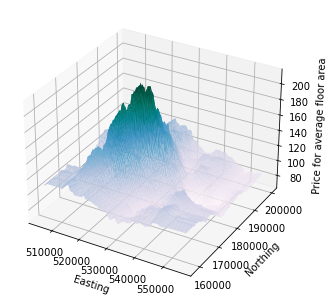

In [25]:
fig = pl.figure()
ax = Axes3D(fig)
ax.plot_surface(east_mesh, north_mesh, hp_mesh, rstride=1, cstride=1, cmap='PuBuGn',lw=0.01)
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
ax.set_zlabel('Price for average floor area')
pl.show()

The 3D plot above shows the house price for the average floor area(92.88 square metres) in London. As we can see the plot shows a decreasing trend of the house price as the location move to further easting and southing area of London. Even the floor area is fixed, but the price of the house illustrates the dramatic difference. It makes sense because the highest price area is the centre of London, the owner of the house most are work at the business, celebrities or royal area etc.

After plot the average floor area 3D surface plot, it is possible to build a function to draw the new 3D surface automatically. Here is the function <b><code>surf3d</code></b>, now we can assign the fix value of floor area in to this function.

In [30]:
def surf3d(pp_model,fl_area):
    east_mesh, north_mesh = np.meshgrid(
        np.linspace(505000,555800,100),
        np.linspace(158400,199900,100))
    fl_mesh = np.zeros_like(east_mesh)
    fl_mesh[:,:] = fl_area
    grid_predictor_vars = np.array([east_mesh.ravel(),
        north_mesh.ravel(),fl_mesh.ravel()]).T
    hp_pred = pp_model.predict(grid_predictor_vars)
    hp_mesh = hp_pred.reshape(east_mesh.shape)
    fig = pl.figure()
    ax = Axes3D(fig)
    ax.plot_surface(east_mesh, north_mesh, hp_mesh, 
        rstride=1, cstride=1, cmap='PuBuGn',lw=0.01)
    ax.set_xlabel('Easting')
    ax.set_ylabel('Northing')
    ax.set_zlabel('Price at %3.2d' %fl_area +' square metres')
    pl.show()
    return

<br>
<h5> 3D plot of the house price for floor area of 75 squre metres.</h5>

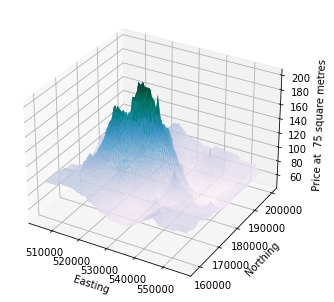

In [31]:
pl.close()
surf3d(opt_nn,75)
pl.show()

The similar information presented in the above graph, as the location moves to further easting and southing area, the price of house drop significantly,  which also means these areas most are far from the city centre. The floor area of this plot is 75 square metres, which is smaller than the average floor size of London, compared with 92.88 square metres, the price decline around 20000 pounds at the most area in London.         


<br>
<h5> 3D plot of the house price for floor area of 125 squre metres.</h5>

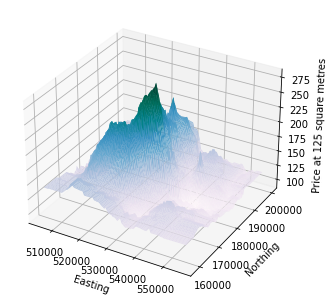

In [32]:
pl.close
surf3d(opt_nn,125)
pl.show()

 One more time, the graph above shows the trend we already met from the last two.  This time the floor area is 125 square metres, compare it to the previous two, the price greater than them, but not far away from what is normal, however, the area which further northing and westing area is a good choice to make the investment if the big family want to move the house from 75 square metres to the bigger house(125 square metres) the price in suburb area will increase about 40000 pounds, and in the city centre the price gets higher, the most expensive place will up to almost 275000 pounds, which grow around 75000 pounds in the same area.  

Overall, this assignment analyses the data set for house price in London, we trained the computer to find out the rule and trend in this data set by using machine learning algorithm K nearest neighbour,  then we confirmed the best tuning parameters by cross-validation. After determining the best-fitting parameters, we can use these results to predict any house price in London. After that, the prediction of house price could be visualized in the 3D plot by matplotlab package, there is much useful information in the graphs, we can observe the trend of price from west to east, south to north. And without using spatial geographical technology, the location information also can be shown by 3D plots. Anyway, the highest house price laid in the centre of London without any doubts.  And it's a bright choice to make an investment there.